# Image Resizing Using Bilinear Interpolation

*image preprocessing*, *bilinear interpolation*

\textbf{Problem} 

Image resize techniques try to interpolate the image intensity values for the pixels of the resized image that do not directly mapped to the original image. We want to resize an image `tiger.jpg` of `853 x 1280` size to `1500 x 1500`. 

\textbf{Method} 

We use bilinear interpolation to resize the image. Bilinear interpolation is performed using linear interpolation first in one direction, and then again in the other direction.

For example, suppose we want to find the value of the unknown function $f$ at the point $(x,y)$. Assume we know the value of $f$ at the four points $Q_{11} = (x_1, y_1)$, $Q_{12} = (x_1, y_2)$, $Q_{21} = (x_2, y_1)$, and $Q_{22} = (x_2, y_2)$. 

We first do linear interpolation in the $x$-direction. This yield,
$$ f(R_1) = f(x, y_1) \approx \frac{x_2 - x}{x_2 - x_1} f(Q_{11}) + \frac{x - x_1}{x_2 - x_1} f(Q_{21}) $$
$$ f(R_2) = f(x, y_2) \approx \frac{x_2 - x}{x_2 - x_1} f(Q_{12}) + \frac{x - x_1}{x_2 - x_1} f(Q_{22}) $$

Then, we interpolate in the $y$-direction,
$$ f(P) = f(x, y) \approx \frac{y_2 - y}{y_2 - y_1} f(R_1) + \frac{y - y_1}{y_2 - y_1} f(R_2) $$

Note that we arrive at the same result if the interpolation is done first along the $y$-direction. Repeatedly doing this, we can obtain an image of bigger size. 

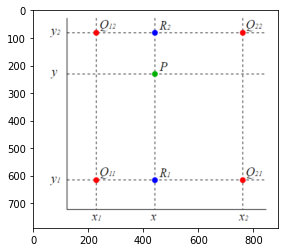

In [3]:
image = plt.imread('bilinear.png')
plt.imshow(image)
plt.show()

In [1]:
import numpy as np
import pandas as pd
from math import floor
import scipy.ndimage as ndi
from PIL import Image, ImageOps
from sklearn.cluster import k_means
import math
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6, 4)

In [4]:
def interpolate2d_bilinear(image, new_size):
    # image is a 2d array
    # new_size is a tuple with new size dimensions (width, height)
    
    w_, h_ = image.shape
    w, h = new_size
    image_new = np.zeros((w, h), dtype=np.uint8)
    
    for x in range(w):
        for y in range(h):
            
            # find the nearest four points of the original image
            x1_ = min(floor(x / (w / w_)), w_-1)
            y1_ = min(floor(y / (h / h_)), h_-1)
            x2_ = min(x1_ + 1, w_-1)
            y2_ = min(y1_ + 1, h_-1)
            
            # map back four points to new image dimensions
            x1, x2 = int(x1_ * (w / w_)), int(x2_ * (w / w_))
            y1, y2 = int(y1_ * (h / h_)), int(y2_ * (h / h_))
            
            # interpolation in x
            if x2 != x1:
                fx_y1 = (x2 - x)/(x2 - x1) * image[x1_,y1_].astype(float) + \
                    (x - x1)/(x2 - x1) * image[x2_,y1_].astype(float)
                fx_y2 = (x2 - x)/(x2 - x1) * image[x1_,y2_].astype(float) + \
                    (x - x1)/(x2 - x1) * image[x2_,y2_].astype(float)
            else:
                fx_y1, fx_y2 = image[x1_,y1_], image[x1_,y2_]
                
            # interpolation in y
            if y2 != y1: 
                value = (y2 - y)/(y2 - y1) * fx_y1 + (y - y1)/(y2 - y1) * fx_y2
            else:
                value = fx_y1
                
            # handle out of bounds 
            image_new[x,y] = max(min(255, int(value)), 0)

    return image_new

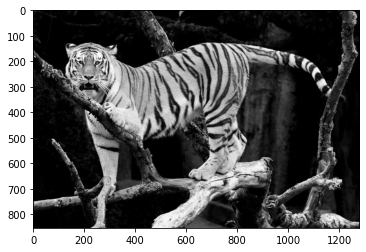

In [182]:
# test image 
image = plt.imread('HW images/tiger-1.jpg')
plt.imshow(image, cmap='gray')
plt.show()

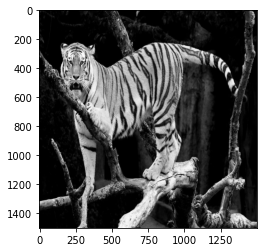

In [183]:
image_new = interpolate2d_bilinear(image, (1500, 1500))
plt.imshow(image_new, cmap='gray')
plt.show()

In [5]:
# compare with the package
im = Image.open('HW images/tiger-1.jpg')
im1 = im.resize((1500,1500))
im1